# Comparing Bandit Agents

This notebook compares the performance of different bandit agents.

In [6]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

from bart_playground.bandit.sim_util import *
from compare_agents import (
    compare_agents_across_scenarios, print_summary_results, plot_comparison_results
)

In [7]:
# Create test scenarios
scenarios = {
    # "Linear": LinearScenario(P=4, K=2, sigma2=1.0),
    # "LinearOffset": LinearOffsetScenario(P=4, K=2, sigma2=1.0),
    # "Offset": OffsetScenario(P=4, K=2, sigma2=1.0),
    # "Friedman": FriedmanScenario(P=5, K=2, sigma2=1.0, lambda_val=5),
    # "Friedman2": Friedman2Scenario(P=5, K=2, sigma2=1.0, lambda_val=20),
    # "Sparse": FriedmanScenario(P=25, K=2, sigma2=1.0, lambda_val=5),
    "Sparse2": Friedman2Scenario(P=25, K=2, sigma2=1.0, lambda_val=5),
}

np.random.seed(42)

In [8]:
# Define experiment parameters
from bart_playground.bandit.bcf_agent import BCFAgent, BCFAgentPSOff
from bart_playground.bandit.basic_agents import SillyAgent, LinearTSAgent
from bart_playground.bandit.ensemble_agent import EnsembleAgent
from bart_playground.bandit.me_agents import HierTSAgent, LinearTSAgent2, LinearUCBAgent, METSAgent
# Import the ROME agents
from bart_playground.bandit.rome.rome_agent import RoMEAgent, _featurize
from bart_playground.bandit.rome.baseline_agents import StandardTSAgent, ActionCenteredTSAgent, IntelligentPoolingAgent

import multiprocessing

cores = 8 # multiprocessing.cpu_count()

n_simulations = 32  # Number of simulations per scenario
n_draws = 500      # Number of draws per simulation

def call_func():
    return(compare_agents_across_scenarios(
        scenarios=scenarios,
        n_simulations=n_simulations,
        n_draws=n_draws,
        agent_classes=[
        #    SillyAgent,
            LinearTSAgent,
        #    RoMEAgent,
            StandardTSAgent,
            ActionCenteredTSAgent, 
            IntelligentPoolingAgent,
            BCFAgent,
            # EnsembleAgent
        ],
        agent_names=[
        #    "Random",
            "LinearTS",
        #    "RoME",
            "StandardTS",
            "ActionCenteredTS",
            "IntelligentPooling",
            "MBCF-TS (★)",
            # "MBCF+Linear (▲)"
        ],
        n_jobs=cores, # min(n_simulations, cores),  # Use all available cores or the number of simulations, whichever is smaller
        batch_size=1
    ))

In [9]:
from bart_playground.samplers import Sampler
from bart_playground.bandit.sim_util import simulate
from bart_playground.bandit.bcf_agent import BCFAgent, BCFAgentPSOff
from bart_playground.bandit.sim_util import Scenario
# %load_ext memory_profiler
# %mprun -f BCFAgent.update_state call_func()

In [10]:
# %mprun -f RoMEAgent.update_state call_func()

In [11]:
results = call_func()

Processing batch 1/1: scenarios 1-1 (32 jobs)


Simulating: 100%|██████████| 500/500 [00:54<00:00,  9.24it/s]


## Print Summary Results

Let's print a summary of the results for each scenario.

In [12]:
print_summary_results(results)


=== Sparse2 Scenario ===

Final cumulative regrets (mean ± std):
  LinearTS: 15587.95 (±6783.76)
  StandardTS: 10326.64 (±4104.17)
  ActionCenteredTS: 20262.46 (±10768.43)
  IntelligentPooling: 16730.68 (±9165.08)
  MBCF-TS (★): 6540.50 (±3887.70)

Average computation times (seconds):
  LinearTS: 0.1183 (±0.0108)
  StandardTS: 0.3287 (±0.0266)
  ActionCenteredTS: 0.2379 (±0.0183)
  IntelligentPooling: 12.2580 (±4.4948)
  MBCF-TS (★): 28.1946 (±8.7310)



## Visualize Results

Finally, let's visualize the cumulative regret for each agent across scenarios.

In [13]:
# Create results directory if it doesn't exist
results_dir = "./results/agent_comparison22_sp_test"
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

import pickle

result_filename = os.path.join(results_dir, f"result.pkl")

In [14]:
with open(result_filename, "wb") as file:
    pickle.dump((results, n_draws), file)


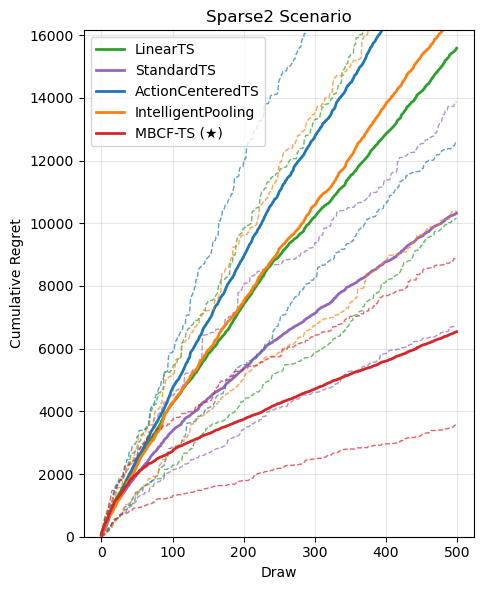

In [15]:
# import pickle
# results_dir = "./results/agent_comparison5"
# result_filename = os.path.join(results_dir, f"result.pkl")
results, n_draws = pickle.load(file=open(result_filename, "rb"))

# Plot results and save to file
plot_comparison_results(
    results=results,
    n_draws=n_draws,
    save_path=f"{results_dir}/agent_comparison_results.png",
    show_time=False
)